<a href="https://colab.research.google.com/github/dddonghwa/deep-learning-with-python/blob/main/ch3_01_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from keras.datasets import mnist

(train_images, train_labels),(test_images, test_labels)=  mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


###cf. Keras 네트워크 시각화하기 [링크](https://dacon.io/codeshare/4199)

```
model.summary()
plot_model(model, show_shapes=True, to_file='name.png')
```

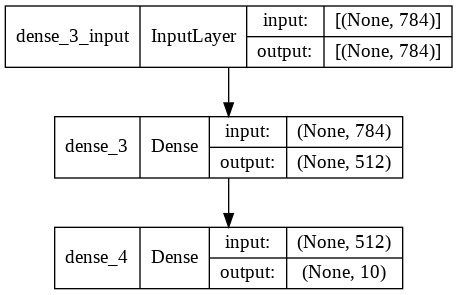

In [33]:
# 2-2. 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

from tensorflow.keras.utils import plot_model
plot_model(network, show_shapes=True, to_file='model.png')

In [34]:
# 2-3. 컴파일 단계

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [35]:
# 2-4. 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255.0

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255.0

In [36]:
# 2-5 레이블 준비하기
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [37]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2590 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1055 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0689 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0492 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0375 - accuracy: 0.9884


In [38]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc :",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9778
test_acc : 0.9778000116348267


### 2.3.2 브로드캐스팅

In [40]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]

  return x

In [41]:
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1

  z = 0
  for i in range(x.shape[0]):
    z += x[i]*y[i]

  return z

In [42]:
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeors(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i,j]*y[j]

  return z

In [43]:
def naive_matrix_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      z[i,j] = naive_vector_dot(x[i,:], y[:,j])
  return z

# 3장. 신경망 시작하기

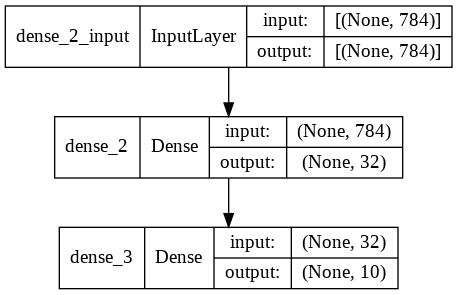

In [5]:
from keras import layers, models
from tensorflow.keras.utils import plot_model

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))
plot_model(model, show_shapes=True)

#### 문제 종류에 따른 손실함수
- 이진분류 : binary crossentropy
- 다중분류 : categorical crossentropy
- 회귀 : MSE(Mean Squared Error)
- 시퀀스 : CTC(Connection Temporal Classification)

## 3.4 영화 리뷰 분류 : 이진 분류 예제

### 3.4.1 IMDB 데이터셋
리뷰 5만개  
훈련 데이터 2.5만개, 테스트 데이터 2.5만개  
각각 긍정 50%, 부정 50%로 레이블  
Keras.datasets에 내장  
__각 리뷰 데이터는 단어 시퀀스가 인코딩된 것이기 때문에 단어 인텍스의 리스트 형태__

In [13]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000) # num_words = 가장 자주 나타나는 단어 갯수 설정
print(train_data.shape)
print(test_data.shape)


17473536/17464789 [==============================] - 0s 0us/step
(25000,)
(25000,)


In [16]:
print(train_data[0])
print(len(train_data[0]), len(train_data[1]))
print(train_labels[0])
print(np.unique(train_labels, return_counts=True)) # 클래스 종류 및 갯수
print(max([max(sequence) for sequence in train_data])) # 가장 자주 등장하는 단어 1만 개로 제한했기 때문에 단어 인덱스가 9999를 넘지 않음

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218 189
1
(array([0, 1]), array([12500, 12500]))
9999


#### 단어 인덱싱 확인하기

단어와 정수 인덱스를 매핑한 딕셔너리 
`imdb.get_word_index()`

In [17]:
word_index = imdb.get_word_index()
reverse_word_index = dict( 
    [(value, key) for (key,value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]] # 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺌
)
print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [18]:
for i in range(5):
  print(len(train_data[i]))

# 샘플마다 인덱싱 리스트의 길이가 다름

218
189
141
550
147


### 3.4.2 데이터 준비
리스트 → 텐서 바꾸는 두 가지 방법  
1) 같은 길이가 되도록 리스트에 패딩을 추가하여 (samples, sequence_length) 크기의 정수 텐서로 변환  
2) 리스트를 원핫인코딩으로 변환, 각 인덱스가 열 번호가 되어서 (samples, 10000) 크기의 행렬로 변환  


In [19]:
# 코드 3-2. 방법 2)

import numpy as np
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for idx, sequence in enumerate(sequences):
      results[idx, sequence] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train.shape, x_test.shape)


(25000, 10000) (25000, 10000)


In [20]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [21]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

레이블도 벡터로 바꿔준다  
#### cf. `np.asarray()`가 `np.array()`와 다른점
이미 ndarray의 데이터 형태 (data type)이 설정 되어 있고 그 데이터 형태가 다를 경우에만 복사(copy) 가 된다.  
데이터 형태가 같을 경우에 복사하지 않고 그대로 사용한다.


```
# 이미 존재하는 배열에 대해서는 복사하지 않는다.(동일 주소 사용)
>>> a = np.array([1,2,3])
>>> np.asarray(a) is a
True

# 만약 dtype이 설정 되어 있다면, 데이터 형태가 다를 경우에만 복사한다.
>>> b = np.array([1,2,3],dtype = np.float32)

# np.array는 데이터 형태 일치 여부에 상관없이 복사함. (다른 주소 할당 O)
>>> np.array(b, dtype = np.float32) is b  
False

# np.asarray
 # 데이터 형태가 같을 때는 복사하지 않는다. (다른 주소 할당X, 그대로 사용)
>>> np.asarray(b, dtype = np.float32) is b  
True
 # 데이터 형태가 다를때 복사한다. (다른 주소 할당 O)
>>> np.asarray(b, dtype = np.float64) is b  
False
```

In [22]:
# 레이블 인코딩
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


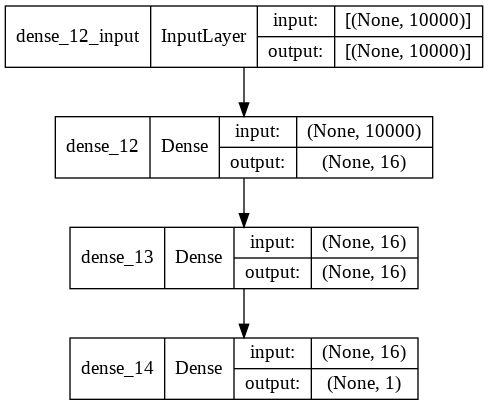

In [65]:
# 코드 3-3 모델 정의하기

from keras import models, layers
from tensorflow.keras.utils import plot_model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

plot_model(model, show_shapes=True)

In [24]:
# 코드 3-4 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

옵티마이저 매개변수 변경(코드 3-5) 또는 손실함수 사용자화 (코드 3-6)

In [25]:
# 코드 3-5 옵티마이저 설정하기
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
# 코드 3-6 손실과 측정을 함수 객체로 지정하기
from keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### 3.4.4 훈련 검증
훈련과 검증 데이터셋 분리


In [28]:
# 코드 3-7 검증 세트 준비하기
x_val = x_train[:10000,]
partial_x_train = x_train[10000:,]
y_val = y_train[:10000,]
partial_y_train = y_train[10000:,]

모델 512 샘플씩 미니배치 생성, 20번 epoch동안 훈련  
1만개의 검증 데이터셋에 대해서 손실과 정확도 측정 → 매개변수 `validation_data`에 전달 

In [66]:
# 코드 3-8 모델 훈련하기
from tensorflow.keras import optimizers
from keras import losses, metrics

# model.compile(optimizer = optimizers.RMSprop(learning_rate=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5059 - acc: 0.7877 - val_loss: 0.3767 - val_acc: 0.8671
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2963 - acc: 0.9037 - val_loss: 0.2949 - val_acc: 0.8884
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2156 - acc: 0.9295 - val_loss: 0.2749 - val_acc: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1701 - acc: 0.9440 - val_loss: 0.2733 - val_acc: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1365 - acc: 0.9587 - val_loss: 0.3073 - val_acc: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1165 - acc: 0.9636 - val_loss: 0.2939 - val_acc: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0936 - acc: 0.9727 - val_loss: 0.3203 - val_acc: 0.8818
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0776 - a

`history` 객체 : 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리

In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

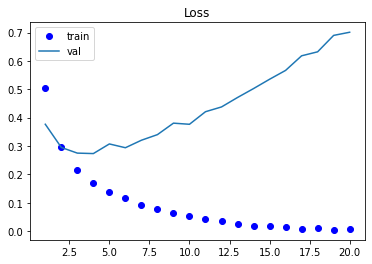

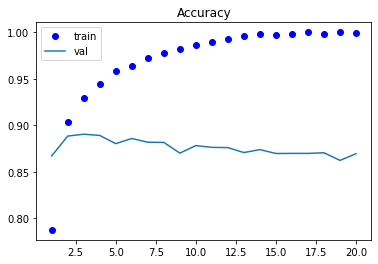

In [70]:
import matplotlib.pyplot as plt

train_loss = history_dict['loss']
train_acc = history_dict['acc']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_acc']

x = np.arange(1,len(train_loss)+1).astype('int8')

plt.plot(x, train_loss, 'bo', label='train')
plt.plot(x, val_loss, label='val')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(x, train_acc, 'bo', label='train')
plt.plot(x, val_acc, label='val')
plt.title('Accuracy')
plt.legend()
plt.show()

In [81]:
# 코드 3-11 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs=4, batch_size=512, 
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 2s 50ms/step - loss: 0.5425 - accuracy: 0.7822 - val_loss: 0.4443 - val_accuracy: 0.8240
Epoch 2/4
30/30 [==============================] - 1s 39ms/step - loss: 0.3315 - accuracy: 0.8995 - val_loss: 0.3447 - val_accuracy: 0.8597
Epoch 3/4
30/30 [==============================] - 1s 40ms/step - loss: 0.2387 - accuracy: 0.9223 - val_loss: 0.3101 - val_accuracy: 0.8758
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2954 - accuracy: 0.8812


In [74]:
print(results) # test_loss, test_acc

[0.29198530316352844, 0.8831999897956848]


In [89]:
def history_plot(history_dict):

  keys = list(history_dict.keys())
  train_loss = history_dict[keys[0]]
  train_acc = history_dict[keys[1]]
  val_loss = history_dict[keys[2]]
  val_acc = history_dict[keys[3]]

  x = np.arange(1,len(train_loss)+1).astype('int8')

  plt.plot(x, train_loss, 'bo', label='train')
  plt.plot(x, val_loss, label='val')
  plt.title('Loss')
  plt.legend()
  plt.show()

  plt.plot(x, train_acc, 'bo', label='train')
  plt.plot(x, val_acc, label='val')
  plt.title('Accuracy')
  plt.legend()
  plt.show()


### 3.4.6 추가 실험

#### 1) 1개 은닉층 사용해보기

__기록__
- 은닉층 2개 & epoch=4 ) loss: 0.1868 - accuracy: 0.9401 - val_loss: 0.2800 - val_accuracy: 0.8877 
- 은닉층 1개 & epoch=4 ) loss: 0.2003 - accuracy: 0.9391 - val_loss: 0.2807 - val_accuracy: 0.8893
- 은닉층 1개 & epoch=6 ) loss: 0.1573 - accuracy: 0.9529 - val_loss: 0.2789 - val_accuracy: 0.8878

__결과__  
동일한 epoch에서 은닉층을 1개로 줄이면 훈련과 검증 데이터셋에서 모두 성능이 약간 떨어지지만, epoch을 6으로 증가시키면 기존 은닉층 2개 & epoch=4만큼 혹은 더 높게 성능이 나온다. 

Epoch 1/6
30/30 [==============================] - 2s 60ms/step - loss: 0.5114 - accuracy: 0.8034 - val_loss: 0.4103 - val_accuracy: 0.8649
Epoch 2/6
30/30 [==============================] - 1s 45ms/step - loss: 0.3342 - accuracy: 0.9011 - val_loss: 0.3304 - val_accuracy: 0.8824
Epoch 3/6
30/30 [==============================] - 1s 44ms/step - loss: 0.2591 - accuracy: 0.9211 - val_loss: 0.2963 - val_accuracy: 0.8882
Epoch 4/6
30/30 [==============================] - 1s 44ms/step - loss: 0.2135 - accuracy: 0.9338 - val_loss: 0.2823 - val_accuracy: 0.8904
Epoch 5/6
30/30 [==============================] - 1s 44ms/step - loss: 0.1816 - accuracy: 0.9456 - val_loss: 0.2797 - val_accuracy: 0.8877
Epoch 6/6
30/30 [==============================] - 1s 43ms/step - loss: 0.1573 - accuracy: 0.9529 - val_loss: 0.2789 - val_accuracy: 0.8878


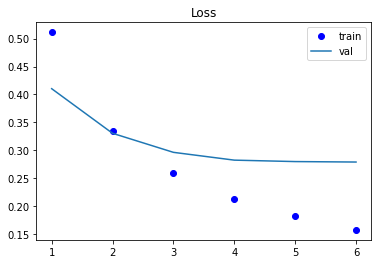

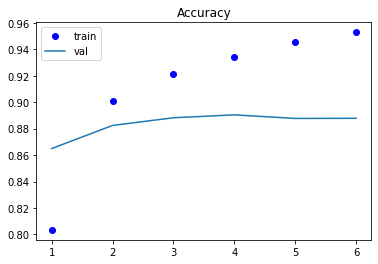

782/782 [==============================] - 2s 2ms/step - loss: 0.2991 - accuracy: 0.8776
[0.29905763268470764, 0.877560019493103]


In [98]:
# 1) 은닉층 1개
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
          epochs=6,
          batch_size=512,
          validation_data=(x_val, y_val))

history_plot(history.history)
print(model.evaluate(x_test, y_test))

#### 2) 3개 은닉층 사용해보기  
__기록__
- 은닉층 1개 & epoch=6 ) loss: 0.1573 - accuracy: 0.9529 - val_loss: 0.2789 - val_accuracy: 0.8878
- 은닉층 3개 & epoch=6 ) loss: 0.1174 - accuracy: 0.9657 - val_loss: 0.2996 - val_accuracy: 0.8847

__결과__   
은닉층 1개에 비해서 과적합이 일어남


Epoch 1/10
30/30 [==============================] - 2s 55ms/step - loss: 0.5609 - accuracy: 0.7522 - val_loss: 0.4328 - val_accuracy: 0.8698
Epoch 2/10
30/30 [==============================] - 1s 42ms/step - loss: 0.3416 - accuracy: 0.8980 - val_loss: 0.3601 - val_accuracy: 0.8558
Epoch 3/10
30/30 [==============================] - 1s 41ms/step - loss: 0.2398 - accuracy: 0.9256 - val_loss: 0.3020 - val_accuracy: 0.8799
Epoch 4/10
30/30 [==============================] - 1s 41ms/step - loss: 0.1817 - accuracy: 0.9438 - val_loss: 0.3159 - val_accuracy: 0.8765
Epoch 5/10
30/30 [==============================] - 1s 42ms/step - loss: 0.1447 - accuracy: 0.9560 - val_loss: 0.3503 - val_accuracy: 0.8630
Epoch 6/10
30/30 [==============================] - 1s 43ms/step - loss: 0.1174 - accuracy: 0.9657 - val_loss: 0.2996 - val_accuracy: 0.8847
Epoch 7/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0963 - accuracy: 0.9733 - val_loss: 0.4111 - val_accuracy: 0.8613
Epoch 8/10
30

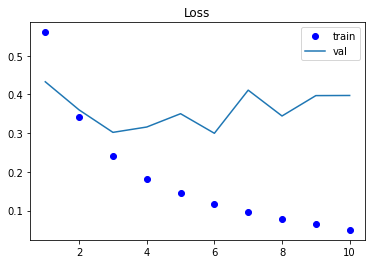

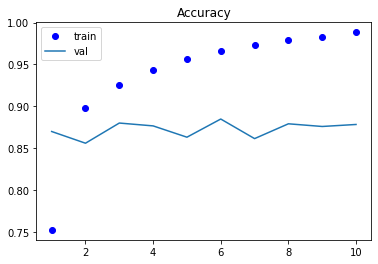

782/782 [==============================] - 2s 3ms/step - loss: 0.4399 - accuracy: 0.8642
[0.4398975670337677, 0.8641999959945679]


In [99]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
          epochs=6,
          batch_size=512,
          validation_data=(x_val, y_val))

history_plot(history.history)
print(model.evaluate(x_test, y_test))

3) 층의 은닉 유닛 추가/제거  - 32개의 유닛  
__기록__  
- 은닉 유닛 16개 & epoch=6 ) loss: 0.1573 - accuracy: 0.9529 - val_loss: 0.2789 - val_accuracy: 0.8878
- 은닉 유닛 32개 & epoch=6 ) loss: 0.1335 - accuracy: 0.9732 - val_loss: 1.0938 - val_accuracy: 0.8410
- 은닉 유닛 64개 & epoch=6 ) loss: 0.1091 - accuracy: 0.9802 - val_loss: 0.6997 - val_accuracy: 0.8698

__결과__  
은닉 유닛 16개가 가장 좋음

Epoch 1/10
30/30 [==============================] - 3s 71ms/step - loss: 1.0439 - accuracy: 0.7033 - val_loss: 0.4078 - val_accuracy: 0.8363
Epoch 2/10
30/30 [==============================] - 2s 60ms/step - loss: 0.3310 - accuracy: 0.8897 - val_loss: 0.4072 - val_accuracy: 0.8709
Epoch 3/10
30/30 [==============================] - 2s 61ms/step - loss: 0.2332 - accuracy: 0.9352 - val_loss: 0.4753 - val_accuracy: 0.8690
Epoch 4/10
30/30 [==============================] - 2s 59ms/step - loss: 0.1722 - accuracy: 0.9578 - val_loss: 0.5543 - val_accuracy: 0.8745
Epoch 5/10
30/30 [==============================] - 2s 62ms/step - loss: 0.1518 - accuracy: 0.9701 - val_loss: 1.4851 - val_accuracy: 0.7700
Epoch 6/10
30/30 [==============================] - 2s 60ms/step - loss: 0.1091 - accuracy: 0.9802 - val_loss: 0.6997 - val_accuracy: 0.8698
Epoch 7/10
30/30 [==============================] - 2s 59ms/step - loss: 0.1028 - accuracy: 0.9840 - val_loss: 0.6644 - val_accuracy: 0.8800
Epoch 8/10
30

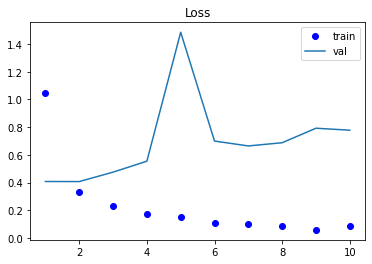

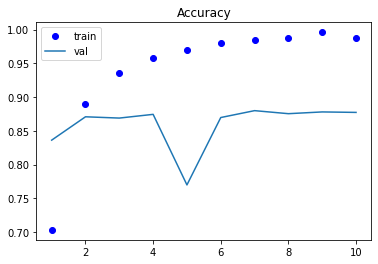

In [103]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # 32/64
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
          epochs=10, 
          batch_size=512,
          validation_data=(x_val, y_val))

print(model.evaluate(x_test, y_test))
history_plot(history.history)